In [8]:
# import lib
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
import os
from sklearn.model_selection import BaseCrossValidator
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
!pip install xgboost
import xgboost as xgb

In [11]:
# import data
train_df = pd.read_csv(r'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\train.csv').drop('id', axis=1)
test_df = pd.read_csv(r'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\test.csv')

In [86]:
count_zeros = (train_df['target'] == 0).sum()

# 獲取總行數
total_rows = len(train_df)

# 計算百分比
percentage = (count_zeros / total_rows) * 100
print(percentage)

36.0


In [13]:
#check data info
print('train_df',train_df.info())
print('test_df',test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 301 entries, target to 299
dtypes: float64(301)
memory usage: 588.0 KB
train_df None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Columns: 301 entries, id to 299
dtypes: float64(300), int64(1)
memory usage: 45.4 MB
test_df None


In [15]:
# seperate data
X = train_df.drop('target', axis=1)
y = train_df['target']
test_Id = test_df['id']
test_X = test_df.drop('id', axis = 1)

In [30]:
#X

In [32]:
#y

In [34]:
#test_Id

In [36]:
#test_X

In [17]:
# standardize data
std = StandardScaler()
st_X = std.fit_transform(X)
st_test_X = std.fit_transform(test_X)

In [29]:
# save to csv function
def save_to_csv(fileName, dataframe):
    path = rf'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\{fileName}.csv'
    if os.path.exists(path):
        print(f"Save aborted: The file '{path}' already exists.")
    else:
        dataframe.to_csv(path, index=False)
        print(f"DataFrame is saved to '{path}'.")

In [27]:
import numpy as np
from sklearn.model_selection import BaseCrossValidator

class CustomSplit(BaseCrossValidator):
    def __init__(self, n_splits=10, random_state=None):
        self.n_splits = n_splits
        self.random_state = random_state

    def split(self, X, y=None, groups=None):

        n_samples = len(X)
        indices = np.arange(n_samples)
        np.random.seed(self.random_state)
        np.random.shuffle(indices)

        fold_sizes = np.full(self.n_splits, n_samples // self.n_splits, dtype=int)
        fold_sizes[:n_samples % self.n_splits] += 1
        current = 0
        for i in range(self.n_splits):
            start, stop = current, current + fold_sizes[i]
            train_idx = indices[start:stop]
            test_idx = np.concatenate([indices[:start], indices[stop:]])
            yield train_idx, test_idx
            current = stop

    def get_n_splits(self, X=None, y=None, groups=None):
        return self.n_splits

In [71]:
train_X, validate_X, train_y, validate_y = train_test_split(X, y, train_size=200, test_size=50, random_state=1)

# Start testing KNN

In [71]:
#knn 3, with origin data
k3_model = KNeighborsClassifier(n_neighbors=3)
k3_model.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=3)

In [73]:
# knn 3 predict
k3_predictions = k3_model.predict(validate_X)

In [75]:
print('accuracy score = ',accuracy_score(validate_y, k3_predictions))
print('ROC_AUC score = ',roc_auc_score(validate_y, k3_predictions))

accuracy score =  0.64
ROC_AUC score =  0.5863970588235294


In [95]:
#train knn 3 model with full data and predict
k3_model.fit(X,y)
k3_predictions = k3_model.predict(test_X)

In [107]:
# knn 3 prediction save to csv
k3_predictions_df = pd.DataFrame({
    'id': test_Id,
    'target': k3_predictions
})
save_to_csv('k3_unscaled_results',k3_predictions_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\k3_unscaled_results.csv'.


In [129]:
#knn 3, with scaled data
k3_scaled_model = KNeighborsClassifier(n_neighbors=3)
k3_scaled_model.fit(st_X,y)

KNeighborsClassifier(n_neighbors=3)

In [131]:
k3_scaled_predictions = k3_scaled_model.predict(st_test_X)

In [133]:
# knn 3 prediction save to csv
k3_scaled_predictions_df = pd.DataFrame({
    'id': test_Id,
    'target': k3_scaled_predictions
})
save_to_csv('k3_scaled_results',k3_scaled_predictions_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\k3_scaled_results.csv'.


In [79]:
knn_model = KNeighborsClassifier()
params_grid={'n_neighbors': [1,3,5,7,9,11,13,15,17,19]}
grid = GridSearchCV(estimator = knn_model, cv = 5, param_grid = params_grid, scoring = 'roc_auc', verbose = 1, n_jobs = -1, refit = True)
grid.fit(X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:0.6185763888888889
Best Parameters: {'n_neighbors': 17}


In [87]:
k17_model = KNeighborsClassifier(n_neighbors = 17)
k17_model.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=17)

In [89]:
# knn 17 predict
k17_predictions = k17_model.predict(validate_X)

In [91]:
print('accuracy score = ',accuracy_score(validate_y, k17_predictions))
print('ROC_AUC score = ',roc_auc_score(validate_y, k17_predictions))

accuracy score =  0.74
ROC_AUC score =  0.6268382352941176


In [109]:
#train knn 17 model with full data and predict
k17_model.fit(X,y)
k17_predictions = k17_model.predict(test_X)

In [111]:
# knn 17 prediction save to csv
k17_predictions_df = pd.DataFrame({
    'id': test_Id,
    'target': k17_predictions
})
save_to_csv('k17_unscaled_results',k17_predictions_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\k17_unscaled_results.csv'.


In [190]:
# find best k value for scaled data
knn_model = KNeighborsClassifier()
custom_cv_instance = CustomSplit(n_splits=10, random_state=1)
params_grid={'n_neighbors': [1,3,5,7,9,11,13,15,17,19]}
grid = GridSearchCV(estimator = knn_model, cv = custom_cv_instance, param_grid = params_grid, scoring = 'roc_auc', verbose = 1, n_jobs = -1, refit = True)
grid.fit(st_X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:0.5764899917663058
Best Parameters: {'n_neighbors': 9}


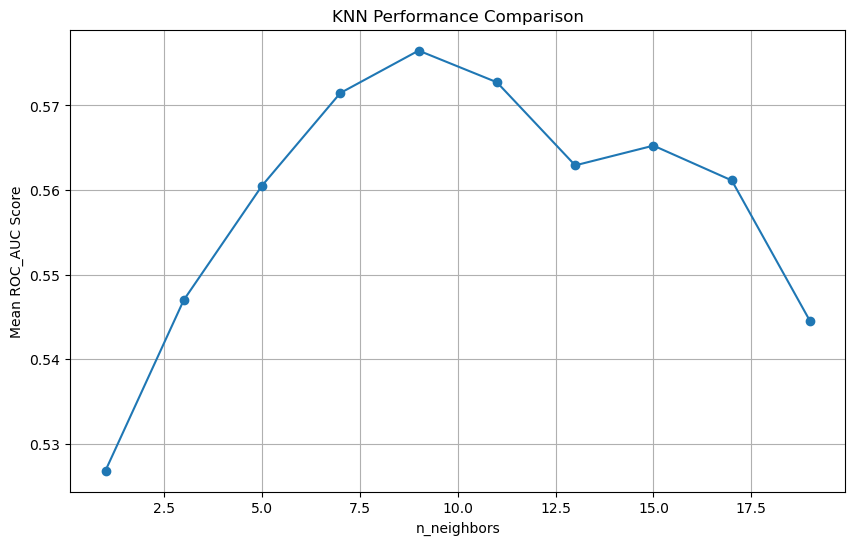

In [192]:
import matplotlib.pyplot as plt

# Extract the parameter settings and mean scores from the results
n_neighbors = grid.cv_results_['param_n_neighbors']
mean_scores = grid.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mean_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean ROC_AUC Score')
plt.title('KNN Performance Comparison')
plt.grid(True)
plt.show()

In [194]:
k9_model = KNeighborsClassifier(n_neighbors = 9)
k9_model.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=9)

In [212]:
# knn 9 predict
k9_predictions = k9_model.predict(validate_X)

In [214]:
print(len(validate_X))
print(len(validate_y))
print(len(k9_predictions))

50
50
50


In [216]:
print('accuracy score = ',accuracy_score(validate_y, k9_predictions))
print('ROC_AUC score = ',roc_auc_score(validate_y, k9_predictions))

accuracy score =  0.82
ROC_AUC score =  0.7849264705882353


In [218]:
#train knn 9 model with full data and predict
k9_model.fit(X,y)
k9_predictions = k9_model.predict(test_X)

In [224]:
# knn 9 prediction save to csv
k9_predictions_df = pd.DataFrame({
    'id': test_Id,
    'target': k9_predictions
})
save_to_csv('k9_unscaled_results',k9_predictions_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\k9_unscaled_results.csv'.


In [226]:
k9_scaled_model = KNeighborsClassifier(n_neighbors = 9)
k9_scaled_model.fit(st_X,y)

KNeighborsClassifier(n_neighbors=9)

In [228]:
# knn 9 scaled predict
k9_scaled_predictions = k9_scaled_model.predict(st_test_X)

In [232]:
# knn 11 prediction save to csv
k9_scaled_predictions_df = pd.DataFrame({
    'id': test_Id,
    'target': k9_scaled_predictions
})
save_to_csv('k9_scaled_results',k9_scaled_predictions_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\k9_scaled_results.csv'.


In [125]:
# find best k value for scaled data
knn_model = KNeighborsClassifier()
params_grid={'n_neighbors': [1,3,5,7,9,11,13,15,17,19]}
grid = GridSearchCV(estimator = knn_model, cv = 5, param_grid = params_grid, scoring = 'roc_auc', verbose = 1, n_jobs = -1, refit = True)
grid.fit(st_X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:0.6251736111111111
Best Parameters: {'n_neighbors': 19}


In [66]:
k19_scaled_model = KNeighborsClassifier(n_neighbors = 19)
k19_scaled_model.fit(st_X, y)

KNeighborsClassifier(n_neighbors=19)

In [68]:
# knn 19 scaled predict
k19_scaled_predictions = k19_scaled_model.predict(st_test_X)

In [70]:
k19_scaled_train_predictions = k19_scaled_model.predict(st_X)

In [72]:
print('accuracy score = ',accuracy_score(y, k19_scaled_train_predictions))
print('ROC_AUC score = ',roc_auc_score(y, k19_scaled_train_predictions))

accuracy score =  0.72
ROC_AUC score =  0.6329861111111111


In [149]:
# knn 19 prediction save to csv
k19_scaled_predictions_df = pd.DataFrame({
    'id': test_Id,
    'target': k19_scaled_predictions
})
save_to_csv('k19_scaled_results',k19_scaled_predictions_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\k19_scaled_results.csv'.


# Below is the logistic regression part(all train will be on scaled data)

In [51]:
LR_model = LogisticRegression()

In [53]:
LR_model.fit(st_X,y)

LogisticRegression()

In [238]:
LR_predictions = LR_model.predict(st_test_X)

In [65]:
type(validate_X)

pandas.core.frame.DataFrame

In [74]:
LR_model = LogisticRegression()
LR_model.fit(train_X,train_y)
LR_train_predictions = LR_model.predict(validate_X)

In [76]:
print('accuracy score = ',accuracy_score(validate_y, LR_train_predictions))
print('ROC_AUC score = ',roc_auc_score(validate_y, LR_train_predictions))

accuracy score =  0.64
ROC_AUC score =  0.6029411764705883


In [240]:
# LR prediction save to csv
LR_predictions_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_predictions
})
save_to_csv('LR_results',LR_predictions_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_results.csv'.


In [242]:
LR_saga_model = LogisticRegression(random_state = 1, solver = 'saga')
LR_liblinear_model = LogisticRegression(random_state = 1, solver = 'liblinear')

In [246]:
custom_cv_instance = CustomSplit(n_splits=10, random_state=1)
saga_params_grid = {
                'penalty' : ['l2','l1','elasticnet'], 
                'l1_ratio': [0.1, 0.5, 0.7, 0.9],
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'class_weight' : ['balanced', None]}
liblinear_params_grid = {
                'penalty' : ['l2','l1'],  
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'class_weight' : ['balanced', None]}
saga_grid = GridSearchCV(estimator = LR_saga_model, param_grid = saga_params_grid , cv = custom_cv_instance, scoring = 'roc_auc', n_jobs = -1)
liblinear_grid = GridSearchCV(estimator = LR_liblinear_model, param_grid = liblinear_params_grid , cv = custom_cv_instance, scoring = 'roc_auc', n_jobs = -1)
saga_grid.fit(st_X, y)
print("saga Best Score:" + str(saga_grid.best_score_))
print("saga Best Parameters: " + str(saga_grid.best_params_))
liblinear_grid.fit(st_X, y)
print("liblinear Best Score:" + str(liblinear_grid.best_score_))
print("liblinear Best Parameters: " + str(liblinear_grid.best_params_))

C:\Users\Steve\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


saga Best Score:0.5900028422081419
saga Best Parameters: {'C': 0.001, 'class_weight': None, 'l1_ratio': 0.1, 'penalty': 'l2'}
liblinear Best Score:0.5896019085401684
liblinear Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}


In [258]:
best_params = saga_grid.best_params_
best_params['solver'] = 'saga'
best_params['l1_ratio'] = None
best_params_LR = LogisticRegression(**best_params)
liblinear_best_params = liblinear_grid.best_params_
liblinear_best_params['solver'] = 'liblinear'
liblinear_best_params_LR = LogisticRegression(**liblinear_best_params)

In [260]:
best_params_LR.fit(st_X, y)

LogisticRegression(C=0.001, solver='saga')

In [262]:
LR_best_params_predictions = best_params_LR.predict(st_test_X)
LR_best_params_results_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_best_params_predictions
})
save_to_csv('LR_best_params_result', LR_best_params_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_best_params_result.csv'.


In [264]:
liblinear_best_params_LR.fit(st_X, y)

LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')

In [266]:
LR_liblinear_best_params_predictions = liblinear_best_params_LR.predict(st_test_X)
LR_liblinear_best_params_results_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_liblinear_best_params_predictions
})
save_to_csv('LR_liblinear_best_params_result', LR_liblinear_best_params_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_liblinear_best_params_result.csv'.


In [268]:
LR_saga_model = LogisticRegression(random_state = 1, solver = 'saga')
LR_liblinear_model = LogisticRegression(random_state = 1, solver = 'liblinear')

In [270]:
saga_params_grid = {
                'penalty' : ['l2','l1','elasticnet'], 
                'l1_ratio': [0.1, 0.5, 0.7, 0.9],
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
liblinear_params_grid = {
                'penalty' : ['l2','l1'],  
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
saga_grid = GridSearchCV(estimator = LR_saga_model, param_grid = saga_params_grid , scoring = 'roc_auc', n_jobs = -1)
liblinear_grid = GridSearchCV(estimator = LR_liblinear_model, param_grid = liblinear_params_grid , scoring = 'roc_auc', n_jobs = -1)
saga_grid.fit(st_X, y)
print("saga Best Score:" + str(saga_grid.best_score_))
print("saga Best Parameters: " + str(saga_grid.best_params_))
liblinear_grid.fit(st_X, y)
print("liblinear Best Score:" + str(liblinear_grid.best_score_))
print("liblinear Best Parameters: " + str(liblinear_grid.best_params_))

saga Best Score:0.8222222222222223
saga Best Parameters: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}
liblinear Best Score:0.8128472222222222
liblinear Best Parameters: {'C': 1, 'penalty': 'l1'}


In [272]:
best_params = saga_grid.best_params_
best_params['solver'] = 'saga'
best_params_LR = LogisticRegression(**best_params)
liblinear_best_params = liblinear_grid.best_params_
liblinear_best_params['solver'] = 'liblinear'
liblinear_best_params_LR = LogisticRegression(**liblinear_best_params)

In [274]:
best_params_LR.fit(st_X, y)

LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [276]:
best_params_predictions = best_params_LR.predict(st_test_X)
best_params_results_df = pd.DataFrame({
    'id': test_Id,
    'target': best_params_predictions
})
save_to_csv('best_params_LR_result_defaultCV', best_params_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\best_params_LR_result_defaultCV.csv'.


In [278]:
liblinear_best_params_LR.fit(st_X, y)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [282]:
best_params_predictions = liblinear_best_params_LR.predict(st_test_X)
best_params_results_df = pd.DataFrame({
    'id': test_Id,
    'target': best_params_predictions
})
save_to_csv('liblinear_best_params_LR_result_defaultCV', best_params_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\liblinear_best_params_LR_result_defaultCV.csv'.


In [288]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import numpy as np
py.init_notebook_mode(connected=True)

In [21]:


def scores_table(model, X, y, subtitle):
    scores = ['accuracy', 'roc_auc']
    res = []
    for sc in scores:
        score_results = cross_val_score(model, X, y, cv=5, scoring=sc)
        res.append(score_results)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df = df.rename(columns={0: 'accuracy', 1: 'roc_auc'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Roc auc'],
                    line=dict(color='#7D7F80'),
                    fill=dict(color='#a1c3d1'),
                    align=['center'],
                    font=dict(size=15)),
        cells=dict(values=[
            ['1', '2', '3', '4', '5', 'mean', 'std'],
            np.round(df['accuracy'], 3),
            np.round(df['roc_auc'], 3)],
                   line=dict(color='#7D7F80'),
                   fill=dict(color='#EDFAFF'),
                   align=['center'], font=dict(size=15)))

    layout = dict(width=800, height=400, title='<b>Cross Validation - 5 folds</b><br>' + subtitle, font=dict(size=15))
    fig = dict(data=[trace], layout=layout)

    iplot(fig, filename='styled_table')

# Example usage:
# Assuming X, y are defined and best_params_LR is a valid logistic regression model
# scaled_train_X = StandardScaler().fit_transform(X_train)  # If you need scaling
# selector = RFE(best_params_LR, n_features_to_select=25, step=1)
# selector.fit(scaled_train_X, y_train)
# scores_table(selector, scaled_train_X, y_train, 'selector_clf')

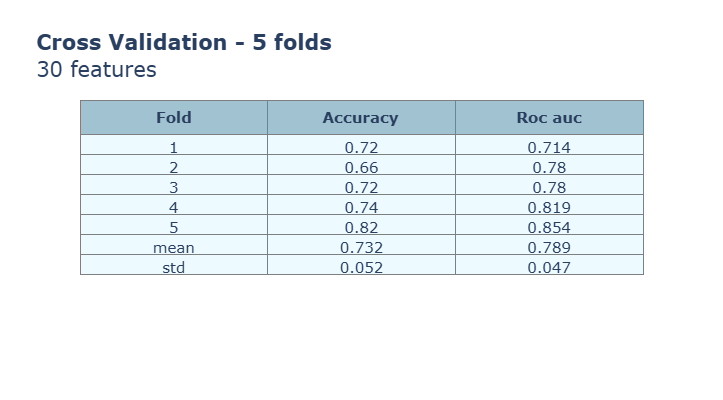

In [314]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=30, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '30 features')

In [316]:
LR_best_30features_predictions = selector.predict(st_test_X)
LR_best_30features_results_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_best_30features_predictions
})
save_to_csv('LR_best_30features_results', LR_best_30features_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_best_30features_results.csv'.


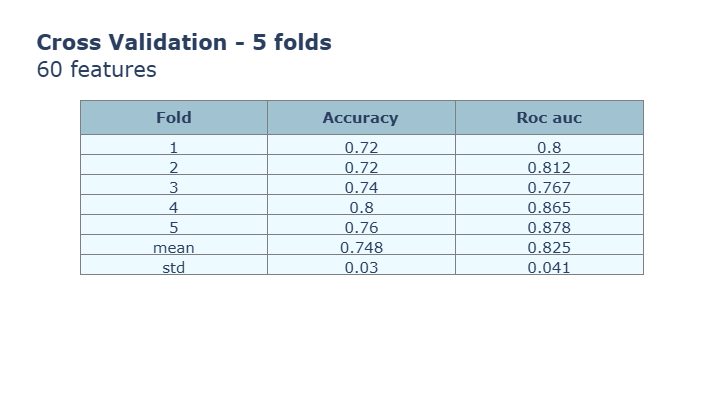

In [302]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=60, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '60 features')

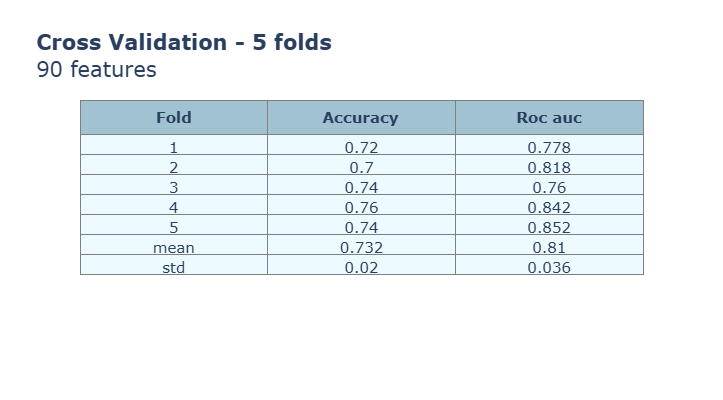

In [303]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=90, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '90 features')

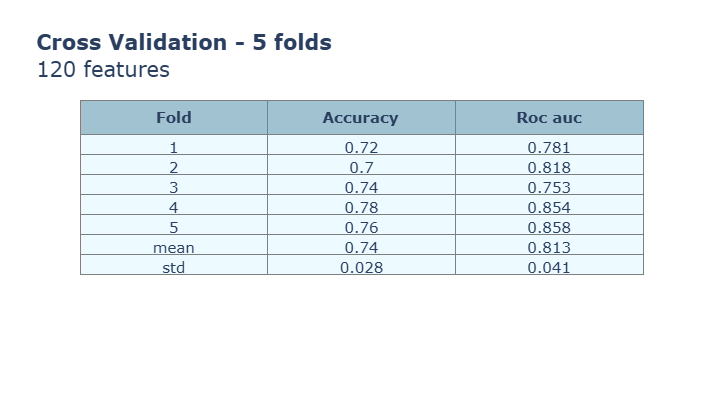

In [306]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=120, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '120 features')

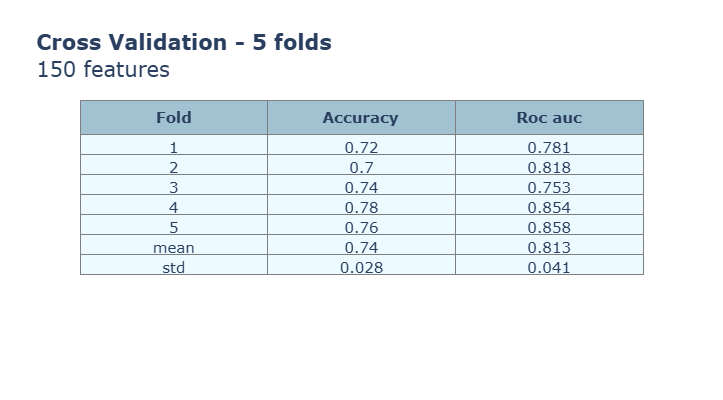

In [308]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=150, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '150 features')

In [310]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=60, step=1)
selector.fit(st_X,y)

RFE(estimator=LogisticRegression(C=1, penalty='l1', solver='liblinear'),
    n_features_to_select=60)

In [312]:
LR_best_60features_predictions = selector.predict(st_test_X)
LR_best_60features_results_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_best_60features_predictions
})
save_to_csv('LR_best_60features_results', LR_best_60features_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_best_60features_results.csv'.


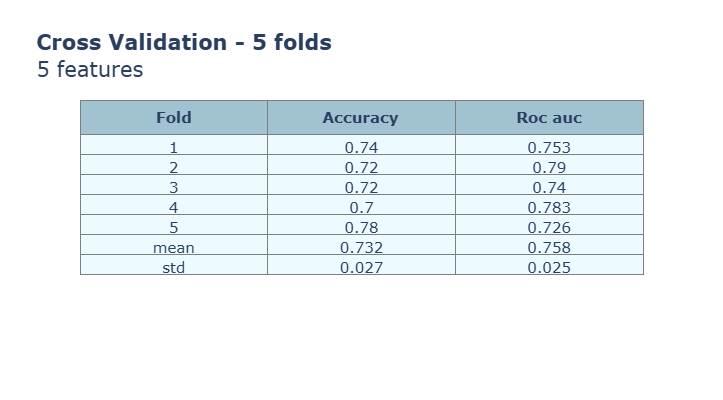

In [318]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=5, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '5 features')

In [320]:
LR_best_5features_predictions = selector.predict(st_test_X)
LR_best_5features_results_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_best_5features_predictions
})
save_to_csv('LR_best_5features_results', LR_best_5features_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_best_5features_results.csv'.


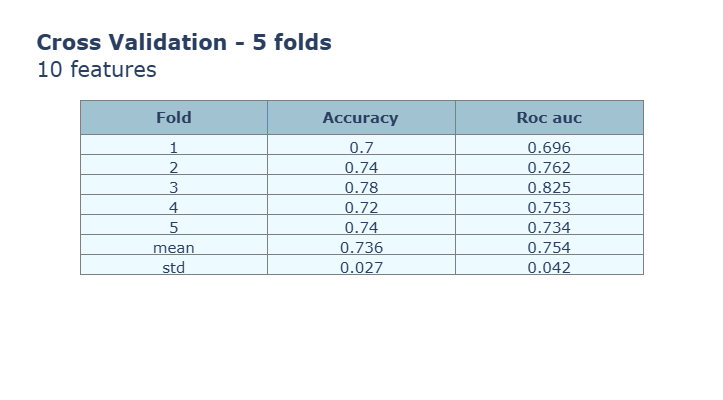

In [322]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=10, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '10 features')

In [324]:
LR_best_10features_predictions = selector.predict(st_test_X)
LR_best_10features_results_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_best_10features_predictions
})
save_to_csv('LR_best_10features_results', LR_best_10features_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_best_10features_results.csv'.


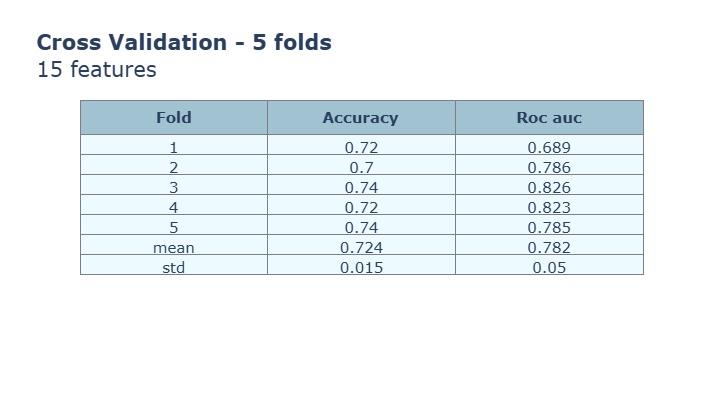

In [326]:
selector = RFE(liblinear_best_params_LR, n_features_to_select=15, step=1)
selector.fit(st_X,y)
scores_table(selector,st_X, y, '15 features')

In [328]:
LR_best_15features_predictions = selector.predict(st_test_X)
LR_best_15features_results_df = pd.DataFrame({
    'id': test_Id,
    'target': LR_best_15features_predictions
})
save_to_csv('LR_best_15features_results', LR_best_15features_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\LR_best_15features_results.csv'.


# below is XGB testing

In [6]:
!pip install xgboost
import xgboost as xgb

In [78]:
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(train_X,train_y)
xgb_train_predictions = xgb_model.predict(validate_X)

In [80]:
print('accuracy score = ',accuracy_score(validate_y, xgb_train_predictions))
print('ROC_AUC score = ',roc_auc_score(validate_y, xgb_train_predictions))

accuracy score =  0.66
ROC_AUC score =  0.5514705882352942


In [38]:
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(st_X,y)
xgb_train_predictions = xgb_model.predict(st_X)
roc_auc_score(y, xgb_train_predictions)

1.0

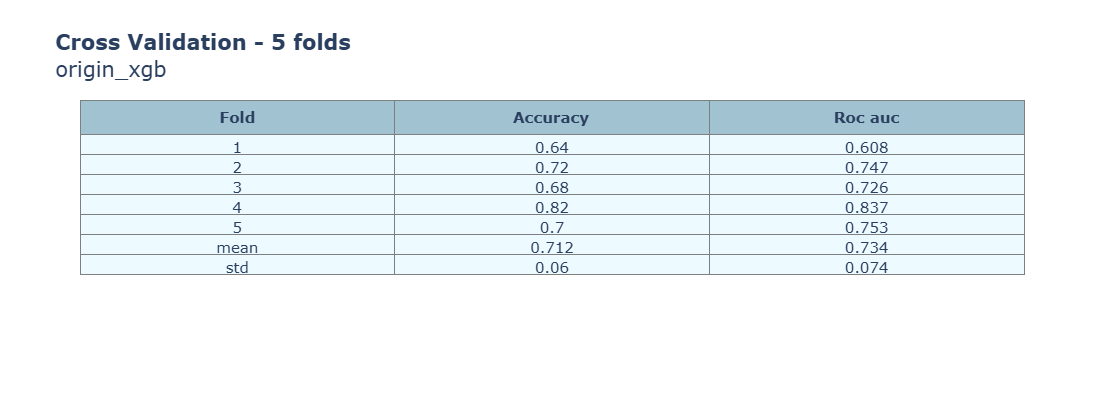

In [42]:
scores_table(xgb_model, st_X, y, 'origin_xgb')

In [339]:
xgb_predictions = xgb_model.predict(st_test_X)
xgb_results_df = pd.DataFrame({
    'id': test_Id,
    'target': xgb_predictions
})
save_to_csv('xgb_results',xgb_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\xgb_results.csv'.


In [26]:
xgb_model1 = xgb.XGBClassifier(random_state=1)
XGB_selector_10 = RFE(xgb_model1, n_features_to_select=10, step=1)
XGB_selector_10.fit(st_X,y)


RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, random_state=1, ...),
    n_features_to_select=10)

In [48]:
XGB_selector_10_predictions = XGB_selector_10.predict(st_test_X)
XGB_selector_10_predictions

array([1, 1, 1, ..., 0, 1, 0])

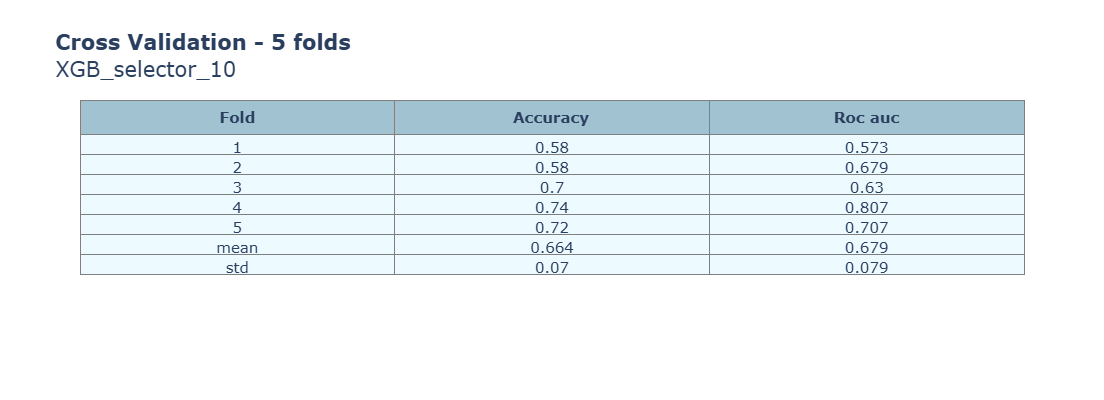

In [44]:
scores_table(XGB_selector_10, st_X, y, 'XGB_selector_10')

In [54]:
XGB_selector_10_results_df = pd.DataFrame({
    'id': test_Id,
    'target': XGB_selector_10_predictions
})
save_to_csv('XGB_selector_10_results',XGB_selector_10_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_10_results.csv'.


In [56]:
xgb_model1 = xgb.XGBClassifier(random_state=1)
XGB_selector_30 = RFE(xgb_model1, n_features_to_select=30, step=1)
XGB_selector_30.fit(st_X,y)


RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, random_state=1, ...),
    n_features_to_select=30)

In [57]:
XGB_selector_30_predictions = XGB_selector_30.predict(st_test_X)

In [58]:
scores_table(XGB_selector_30, st_X, y, 'XGB_selector_30')

In [62]:
XGB_selector_30_results_df = pd.DataFrame({
    'id': test_Id,
    'target': XGB_selector_30_predictions
})
save_to_csv('XGB_selector_30_results',XGB_selector_30_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_30_results.csv'.


In [15]:
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {'objective':['binary:logistic'],
              'learning_rate': [0.005,0.05,0.1, 10], 
              'max_depth': [2,3,4,5],
              'min_child_weight': [10],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators': [1000]}

grid = GridSearchCV(estimator = xgb_model, cv=5, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1, refit=True)
grid.fit(st_X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:0.7552083333333333
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.005, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 1000, 'objective': 'binary:logistic', 'subsample': 0.8}


In [17]:
xgb_model = xgb.XGBClassifier(**best_parameters)
xgb_model.fit(st_X,y)

train_predict = xgb_model.predict(st_X)
roc_auc_score(y, train_predict)

0.9388888888888889

In [19]:
xgb_best_params_predictions = xgb_model.predict(st_test_X)

In [25]:
XGB_best_params_results_df = pd.DataFrame({
    'id': test_Id,
    'target': xgb_best_params_predictions
})
save_to_csv('XGB_best_params_results',XGB_best_params_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_best_params_results.csv'.


In [31]:
cv_instance = CustomSplit()
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {'objective':['binary:logistic'],
              'learning_rate': [0.005,0.05,0.1, 10], 
              'max_depth': [2,3,4,5],
              'min_child_weight': [10],
              'subsample': [0.6,0.8],
              'colsample_bytree': [0.6,0.8],
              'n_estimators': [1000]}

grid = GridSearchCV(estimator = xgb_model, cv=cv_instance, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1, refit=True)
grid.fit(st_X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best Score:0.5
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 1000, 'objective': 'binary:logistic', 'subsample': 0.6}


In [88]:
bp = {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 1000, 'objective': 'binary:logistic', 'subsample': 0.6}
test_xgb = xgb.XGBClassifier(**bp)
test_xgb.fit(st_X,y)
predictions = test_xgb.predict(st_test_X)
XGB_stlt_best_params_results_df = pd.DataFrame({
    'id': test_Id,
    'target': predictions
})
save_to_csv('XGB_stlt_best_params_results',XGB_stlt_best_params_results_df)

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_stlt_best_params_results.csv'.


In [31]:
def xgb_RFE_model_test(n_features):
    xgb_model1 = xgb.XGBClassifier(random_state=1)
    XGB_selector = RFE(xgb_model1, n_features_to_select=n_features, step=1)
    XGB_selector.fit(st_X,y)
    XGB_selector_predictions = XGB_selector.predict(st_test_X)
    name = 'XGB_selector_'+ str(n_features) + 'results'
    scores_table(XGB_selector, st_X, y, name)
    XGB_selector_results_df = pd.DataFrame({
        'id': test_Id,
        'target': XGB_selector_predictions
    })
    save_to_csv(name,XGB_selector_results_df)

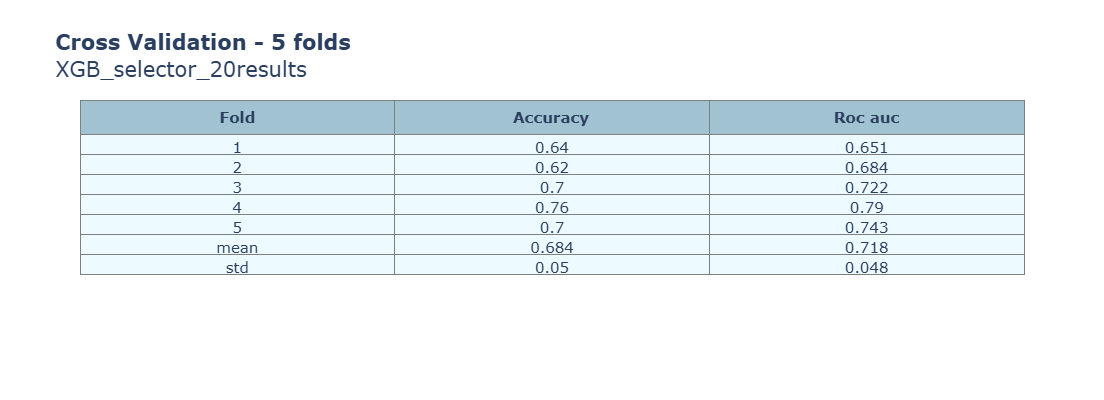

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_20results.csv'.


In [33]:
xgb_RFE_model_test(20)

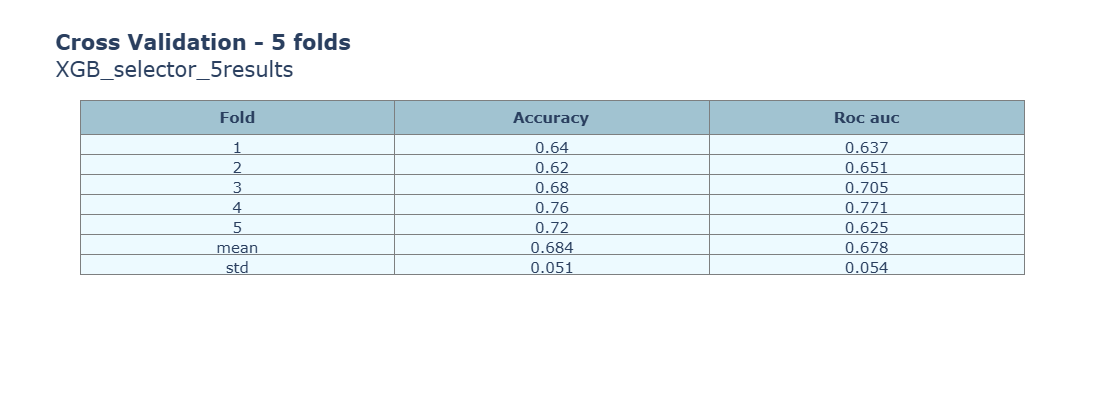

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_5results.csv'.


In [35]:
xgb_RFE_model_test(5)

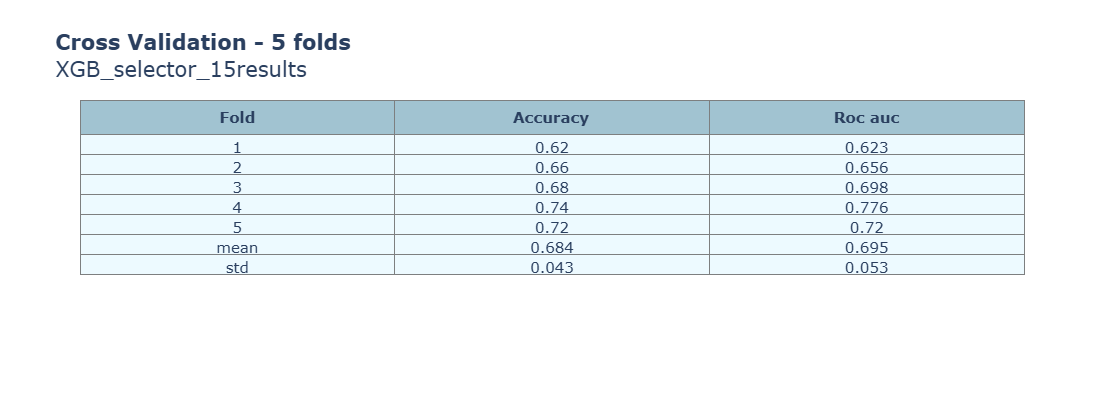

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_15results.csv'.


In [37]:
xgb_RFE_model_test(15)

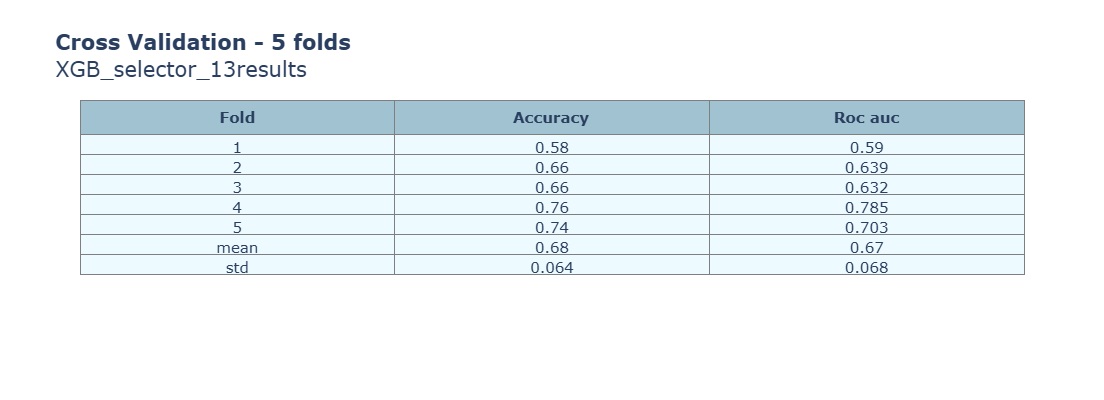

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_13results.csv'.


In [39]:
xgb_RFE_model_test(13)

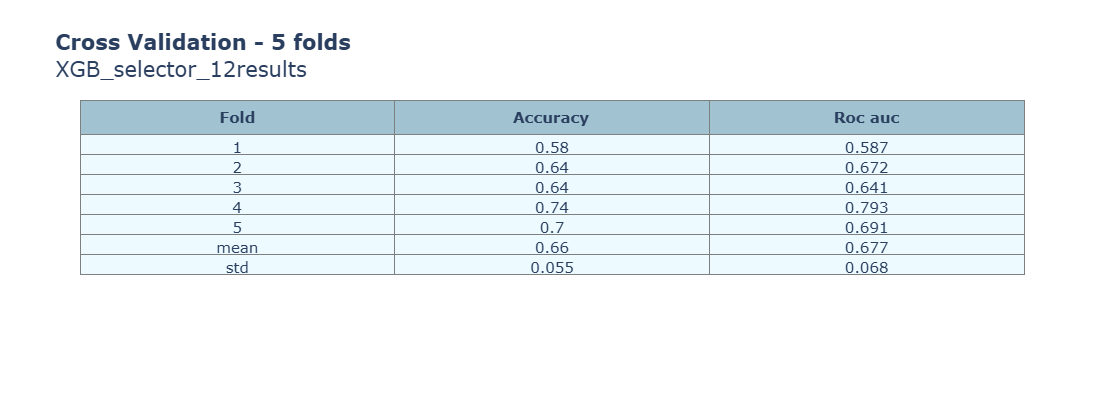

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_12results.csv'.


In [41]:
xgb_RFE_model_test(12)

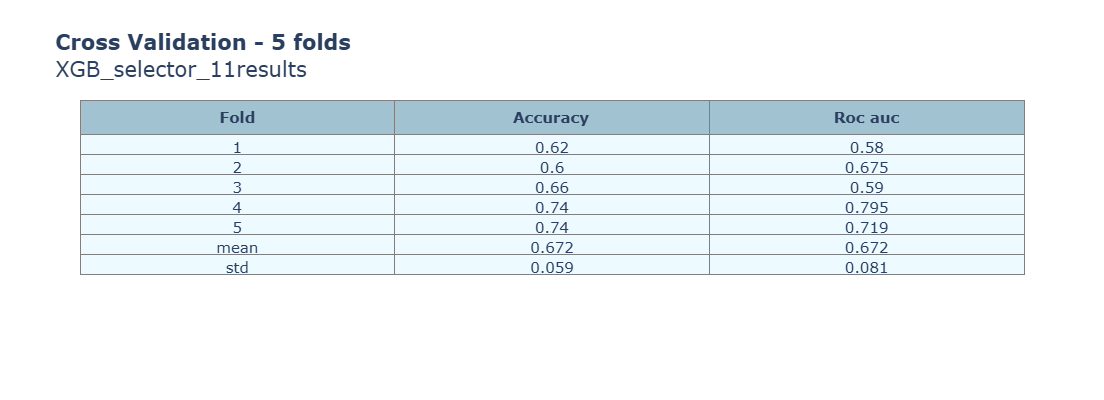

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_11results.csv'.


In [42]:
xgb_RFE_model_test(11)

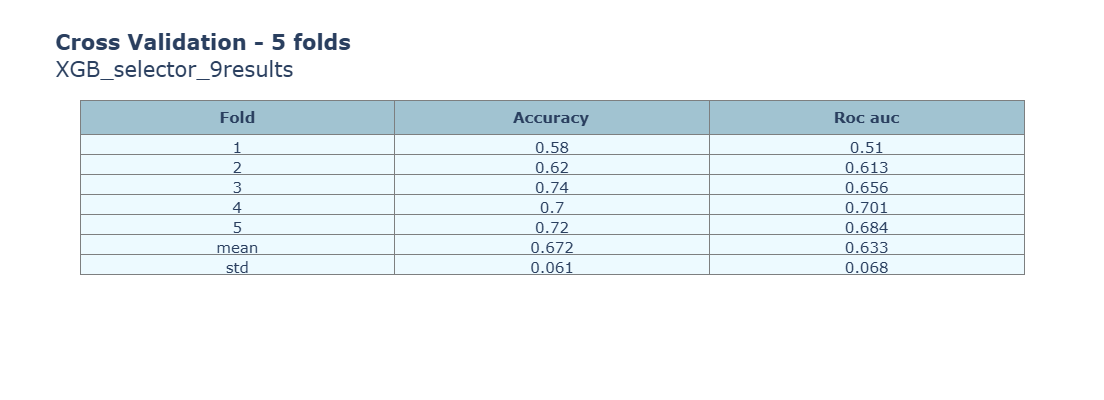

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_9results.csv'.


In [43]:
xgb_RFE_model_test(9)

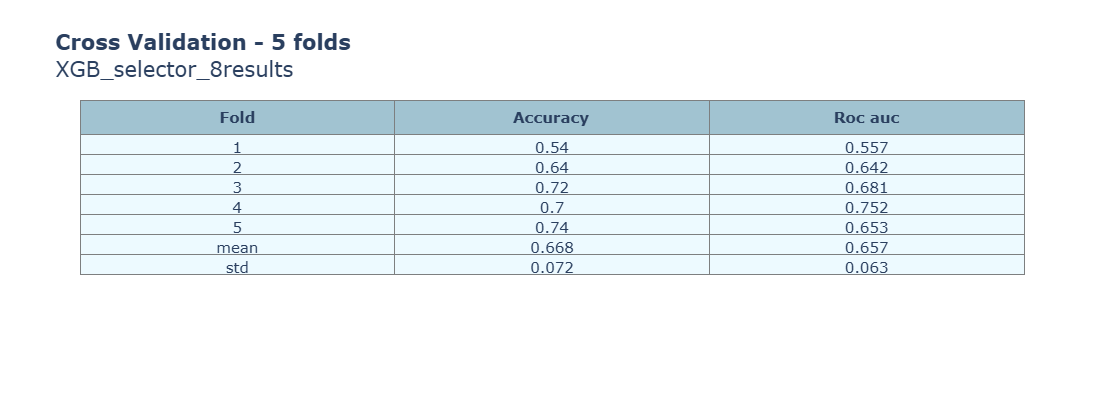

DataFrame is saved to 'F:\大學課程教材\Machine Learning\Machine Learning Competition\dont-overfit-ii\oldVersionDataset1\results\XGB_selector_8results.csv'.


In [47]:
xgb_RFE_model_test(8)

In [48]:
xgb_RFE_model_test(7)

KeyboardInterrupt: 

In [ ]:
xgb_RFE_model_test(6)